<a href="https://colab.research.google.com/github/ginnie3112x/BMIRechnerTTD/blob/master/Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer

df = pd.read_csv('races.csv', sep = ";", header =0, index_col=0)
df = df.head(10)

df


,race_created,race_driven,track_id,challenger,opponent,money,fuel_consumption,winner,status,forecast,weather
id,,,,,,,,,,,
1,\t06.03.2012,06.03.2012 00:00,12,5,2,30,0.63,5,finished,"a:4:{s:5:""sunny"";i:10;s:5:""rainy"";i:70;s:8:""th...",rainy
2,06.03.2012,06.03.2012 00:03,12,5,4,30,0.63,4,finished,"a:4:{s:5:""sunny"";i:70;s:5:""rainy"";i:15;s:8:""th...",sunny
3,06.03.2012,0000-00-00 00:00:00,3,10,5,30,0.63,0,declined,"a:4:{s:5:""sunny"";i:70;s:5:""rainy"";i:10;s:8:""th...",NaN
4,06.03.2012,06.03.2012 00:06,12,5,4,30,0.63,5,finished,"a:4:{s:5:""sunny"";i:25;s:5:""rainy"";i:75;s:8:""th...",sunny
5,06.03.2012,0000-00-00 00:00:00,12,4,5,30,0.63,0,declined,"a:4:{s:5:""sunny"";i:45;s:5:""rainy"";i:20;s:8:""th...",NaN
6,06.03.2012,06.03.2012 00:17,12,5,10,100,0.63,5,finished,"a:4:{s:5:""sunny"";i:30;s:5:""rainy"";i:20;s:8:""th...",snowy
7,06.03.2012,0000-00-00 00:00:00,12,8,5,30,0.63,0,declined,"a:4:{s:5:""sunny"";i:80;s:5:""rainy"";i:5;s:8:""thu...",NaN
8,06.03.2012,0000-00-00 00:00:00,12,8,2,30,0.63,0,retired,"a:4:{s:5:""sunny"";i:95;s:5:""rainy"";i:5;s:8:""thu...",NaN
9,06.03.2012,06.03.2012 00:08,3,10,4,30,0.63,4,finished,"a:4:{s:5:""sunny"";i:45;s:5:""rainy"";i:40;s:8:""th...",sunny


Configures dtypes

In [0]:
df = df.replace('0000-00-00 00:00:00', np.nan)
df['race_created'] = pd.Series(df['race_created'],dtype='datetime64[ns]')
df['race_driven'] = pd.Series(df['race_driven'],dtype='datetime64[ns]')
df['money'] = pd.Series(df['money'],dtype='float64')
df['fuel_consumption'] = pd.Series(df['fuel_consumption'],dtype='float64')

df.dtypes

race_created        datetime64[ns]
race_driven         datetime64[ns]
track_id                     int64
challenger                   int64
opponent                     int64
money                      float64
fuel_consumption           float64
winner                       int64
status                      object
forecast                    object
weather                     object
dtype: object

Resolves the weatherforecast and integrates to table.

Finds the strings with regex, resets the index level and creates 
 pivot table. Merges the result and drop the concerned columns

In [0]:
dic = df.forecast.str.extractall('"(?P<weather>.*?)";i:(?P<percent>\d+)').reset_index(level=0).pivot(index='id', columns='weather', values='percent') 
df = pd.merge(df, dic, how='left', on='id').drop('forecast',axis = 1)
df


,race_created,race_driven,track_id,challenger,opponent,money,fuel_consumption,winner,status,weather,rainy,snowy,sunny,thundery
id,,,,,,,,,,,,,,
1,2012-06-03,2012-06-03 00:00:00,12,5,2,30.0,0.63,5,finished,rainy,70,20,10,0
2,2012-06-03,2012-06-03 00:03:00,12,5,4,30.0,0.63,4,finished,sunny,15,15,70,0
3,2012-06-03,NaT,3,10,5,30.0,0.63,0,declined,NaN,10,5,70,15
4,2012-06-03,2012-06-03 00:06:00,12,5,4,30.0,0.63,5,finished,sunny,75,0,25,0
5,2012-06-03,NaT,12,4,5,30.0,0.63,0,declined,NaN,20,5,45,30
6,2012-06-03,2012-06-03 00:17:00,12,5,10,100.0,0.63,5,finished,snowy,20,45,30,5
7,2012-06-03,NaT,12,8,5,30.0,0.63,0,declined,NaN,5,5,80,10
8,2012-06-03,NaT,12,8,2,30.0,0.63,0,retired,NaN,5,0,95,0
9,2012-06-03,2012-06-03 00:08:00,3,10,4,30.0,0.63,4,finished,sunny,40,5,45,10


In [0]:
df['rainy'] = pd.Series(df['rainy'],dtype='int32')
df['snowy'] = pd.Series(df['snowy'],dtype='int32')
df['sunny'] = pd.Series(df['sunny'],dtype='int32')
df['thundery'] = pd.Series(df['thundery'],dtype='int32')
df.dtypes

race_created        datetime64[ns]
race_driven         datetime64[ns]
track_id                     int64
challenger                   int64
opponent                     int64
money                      float64
fuel_consumption           float64
winner                       int64
status                      object
weather                     object
rainy                        int32
snowy                        int32
sunny                        int32
thundery                     int32
dtype: object

In [0]:
val = []

Average fuel consumption

In [0]:
mean_fuel = df['fuel_consumption'].mean()
print('The average of fuel consumption for all races is', round(mean_fuel, 2))
val.append(mean_fuel)

The average of fuel consumption for all races is 0.63


Maximum fuel consumption

In [0]:
max_fuel = df['fuel_consumption'].max()
print('The maximum of fuel consumption for all races is', round(max_fuel, 2))
val.append(max_fuel)

The maximum of fuel consumption for all races is 0.63


Average money

In [0]:
mean_money = df['money'].mean()
print('The average of money for all races is', round(mean_money, 2))
val.append(mean_money)

The average of money for all races is 37.0


Sum all money

In [0]:
sum_money = df['money'].sum()
print('The sum of money for all races is', round(sum_money, 2),'Dollar')
val.append(sum_money)

The sum of money for all races is 370.0 Dollar


Maximum Money

In [0]:
max_money = df['money'].max()
print('The maximum of money for all races is', round(max_money, 2),'Dollar')
val.append(max_money)

The maximum of money for all races is 100.0 Dollar


In [0]:
header = ['Average fuel consumption', 'Maximum fuel consumption','Average money', 'Sum all money', 'Maximum Money']
p = pd.DataFrame(val, index = header, columns=['Data'])
p

,Data
Average fuel consumption,0.63
Maximum fuel consumption,0.63
Average money,37.00
Sum all money,370.00
Maximum Money,100.00


How often has a driver driven

In [0]:
#gets challengers as a series
chall_group =df.groupby(df['challenger'])
driven1 = chall_group.count().race_driven
driven1

challenger
4     0
5     4
8     1
10    1
Name: race_driven, dtype: int64

In [0]:
#gets challengers as a series
opp_group =df.groupby(df['opponent'])
driven2 = opp_group.count().race_driven
driven2

opponent
2     1
4     3
5     0
10    2
Name: race_driven, dtype: int64

In [0]:
#'merges'the two series and gets the sums
res=pd.DataFrame(driven1).T.append(driven2).sum()
#sorts rows 
res.sort_index()

2     1.0
4     3.0
5     4.0
8     1.0
10    3.0
dtype: float64

Maximum victories (all drivers)

In [0]:
test = res.where(res==res.max())
for label, content in test.items():
  if content >= 0:
    print('Fahrer Nr.',label, 'hat die meisten Siege:',content)

Fahrer Nr. 5 hat die meisten Siege: 4.0


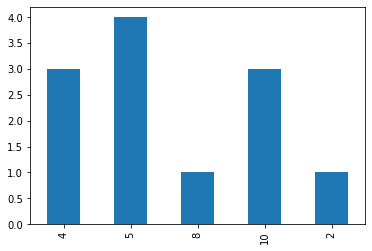

In [0]:
res.plot.bar()

The relation challenger-opponent

In [0]:
#relation challenger-opponent
rel =pd.crosstab(df['challenger'],df['opponent'])
rel

opponent,2,4,5,10
challenger,,,,
4,0,0,1,0
5,1,2,0,1
8,1,0,1,1
10,0,1,1,0


Visualization of challenger-opponent relation

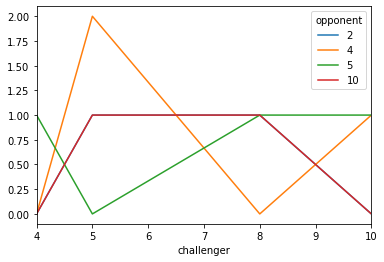

In [0]:
rel.plot()

Subset of tables

In [0]:
#winning relation challenger-opponent
winnertable = df.iloc[0:, 3:9]
winnertable

,challenger,opponent,money,fuel_consumption,winner,status
id,,,,,,
1,5,2,30.0,0.63,5,finished
2,5,4,30.0,0.63,4,finished
3,10,5,30.0,0.63,0,declined
4,5,4,30.0,0.63,5,finished
5,4,5,30.0,0.63,0,declined
6,5,10,100.0,0.63,5,finished
7,8,5,30.0,0.63,0,declined
8,8,2,30.0,0.63,0,retired
9,10,4,30.0,0.63,4,finished


Money and fuel consumption per track

In [0]:
track_grouped = df.groupby(df['track_id'])
track_grouped_sum =track_grouped.sum()
track_grouped_sum


,challenger,opponent,money,fuel_consumption,winner,rainy,snowy,sunny,thundery
track_id,,,,,,,,,
3,20,9,60.0,1.26,4,50,10,115,25
12,48,42,310.0,5.04,29,210,90,455,45


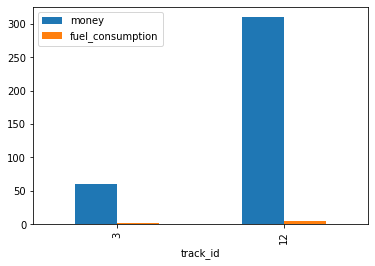

In [0]:
track_grouped_sum.loc[:,'money':'fuel_consumption'].plot.bar()

In [0]:
track_grouped_mean = track_grouped.mean()
track_grouped_mean 

,challenger,opponent,money,fuel_consumption,winner,rainy,snowy,sunny,thundery
track_id,,,,,,,,,
3,10.0,4.50,30.00,0.63,2.000,25.00,5.00,57.500,12.500
12,6.0,5.25,38.75,0.63,3.625,26.25,11.25,56.875,5.625


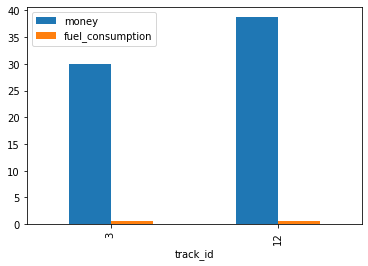

In [0]:
track_grouped_mean.loc[:,'money':'fuel_consumption'].plot.bar()

Money and fuel consumption per winner

In [0]:
winner_grouped = df.groupby(df['winner'])
winner_grouped_sum =winner_grouped.sum()
winner_grouped_sum

,track_id,challenger,opponent,money,fuel_consumption,rainy,snowy,sunny,thundery
winner,,,,,,,,,
0,39,30,17,120.0,2.52,40,15,290,55
4,15,15,8,60.0,1.26,55,20,115,10
5,36,15,16,160.0,1.89,165,65,65,5
10,12,8,10,30.0,0.63,0,0,100,0


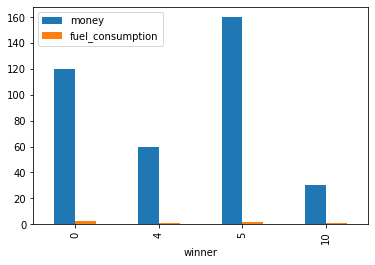

In [0]:
winner_grouped_sum.loc[:,'money':'fuel_consumption'].plot.bar()

How was the weather for the winning driver

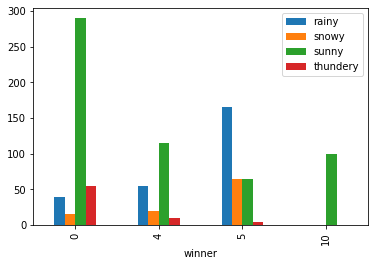

In [0]:
winner_grouped_sum.loc[:,'rainy':].plot.bar()

In [0]:
df3 = pd.DataFrame(df['track_id'], index=[df['race_created']])
df3
df['track_id']
# df3['B'] = pd.Series(list(df[df['race_driven']]))

# df3.plot(x='A', y='B')

id
1     12
2     12
3      3
4     12
5     12
6     12
7     12
8     12
9      3
10    12
Name: track_id, dtype: int64

Money and fuel consumption per season

In [0]:
winner_grouped = df.groupby(df['weather'])
winner_grouped_weather =winner_grouped.sum()
winner_grouped_weather

,track_id,challenger,opponent,money,fuel_consumption,winner,rainy,snowy,sunny,thundery
weather,,,,,,,,,,
rainy,12,5,2,30.0,0.63,5,70,20,10,0
snowy,12,5,10,100.0,0.63,5,20,45,30,5
sunny,39,28,22,120.0,2.52,23,130,20,240,10


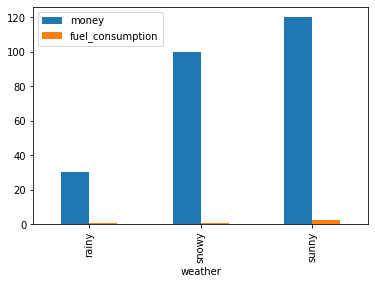

In [0]:

winner_grouped_weather.loc[:,'money':'fuel_consumption'].plot.bar()

Change of probability per races

In [0]:
forecast = df.iloc[:,-5:]
forecast

,weather,rainy,snowy,sunny,thundery
id,,,,,
1,rainy,70,20,10,0
2,sunny,15,15,70,0
3,NaN,10,5,70,15
4,sunny,75,0,25,0
5,NaN,20,5,45,30
6,snowy,20,45,30,5
7,NaN,5,5,80,10
8,NaN,5,0,95,0
9,sunny,40,5,45,10


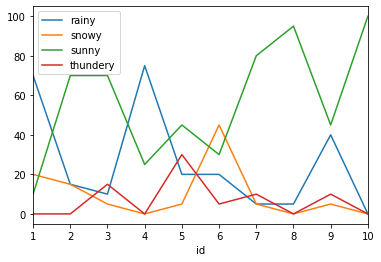

In [0]:
forecast.plot()

The weather - probability and occuring

In [0]:
forec = df.iloc[:,-4:]
mat = df.T
weather_liste=[]
for x,y in mat.iteritems():
  w =forec.T[x].idxmax()
  max= forec.T[x].max()
  date_tup = mat.loc['race_driven',x:x]
  date_str = date_tup.array[0]
  date = date_str.date()
  day = date_str.day_name()

  if str(date) == 'NaT':
    day = ""
    date = 'Rennen ausgefallen'

  print(day+str(date),'Die Wahrscheinlichkeit für',w,'betrug',max,'%')

  weather_tup = mat.loc['weather',x:x]
  weather_str = weather_tup.array[0]
  
  if weather_str == w:

    print('Voraussage eingetroffen!')
  else:
    print('Voraussage nicht eingetroffen.')
  weather_liste.append([date_str, weather_str,w,max ])



Sunday2012-06-03 Die Wahrscheinlichkeit für rainy betrug 70 %
Voraussage eingetroffen!
Sunday2012-06-03 Die Wahrscheinlichkeit für sunny betrug 70 %
Voraussage eingetroffen!
Rennen ausgefallen Die Wahrscheinlichkeit für sunny betrug 70 %
Voraussage nicht eingetroffen.
Sunday2012-06-03 Die Wahrscheinlichkeit für rainy betrug 75 %
Voraussage nicht eingetroffen.
Rennen ausgefallen Die Wahrscheinlichkeit für sunny betrug 45 %
Voraussage nicht eingetroffen.
Sunday2012-06-03 Die Wahrscheinlichkeit für snowy betrug 45 %
Voraussage eingetroffen!
Rennen ausgefallen Die Wahrscheinlichkeit für sunny betrug 80 %
Voraussage nicht eingetroffen.
Rennen ausgefallen Die Wahrscheinlichkeit für sunny betrug 95 %
Voraussage nicht eingetroffen.
Sunday2012-06-03 Die Wahrscheinlichkeit für sunny betrug 45 %
Voraussage eingetroffen!
Sunday2012-06-03 Die Wahrscheinlichkeit für sunny betrug 100 %
Voraussage eingetroffen!


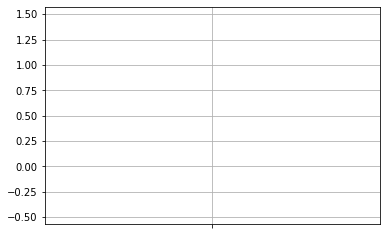

In [0]:
mat.T.boxplot()

In [0]:
columns = ['race_driven', 'weather', 'forecast', 'probability']
forecasts = pd.DataFrame(data=weather_liste, columns=columns)
(forecasts.loc[0:]
    .style
    .background_gradient(cmap='viridis', low=.5, high=0)
    .highlight_null('red'))

,race_driven,weather,forecast,probability
0,2012-06-03 00:00:00,rainy,rainy,70
1,2012-06-03 00:03:00,sunny,sunny,70
2,NaT,nan,sunny,70
3,2012-06-03 00:06:00,sunny,rainy,75
4,NaT,nan,sunny,45
5,2012-06-03 00:17:00,snowy,snowy,45
6,NaT,nan,sunny,80
7,NaT,nan,sunny,95
8,2012-06-03 00:08:00,sunny,sunny,45
9,2012-06-03 00:10:00,sunny,sunny,100
